# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Karinda Amelia
- **Email:** karindaamelia21@gmail.com | A315XBF243@devacademy.id
- **ID Dicoding:** karindaamelia

## Menentukan Pertanyaan Bisnis

- Bagaimana variasi jumlah penyewaan sepeda berdasarkan musim, dan musim mana yang memiliki permintaan tertinggi?
- Bagaimana pengaruh kondisi cuaca terhadap pola penyewaan sepeda?
- Bagaimana tren penyewaan sepeda per jam sepanjang hari, dan kapan waktu penggunaan tertinggi?
- Apakah terdapat perbedaan signifikan dalam pola penyewaan sepeda antara hari kerja dan akhir pekan?
- Bagaimana distribusi dan rasio antara pengguna kasual dan terdaftar di berbagai periode waktu?
- Bagaimana dampak hari libur terhadap pola penyewaan sepeda dibandingkan dengan hari biasa?
- Apakah terdapat korelasi antara suhu, kelembaban, kecepatan angin, dan jumlah penyewaan sepeda?




## Import Semua Packages/Library yang Digunakan

In [34]:
# Import semua library dan packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import warnings

In [35]:
# Menonaktifkan warnings
warnings.filterwarnings("ignore")

## Data Wrangling

### Gathering Data

In [36]:
# Load data (hour.csv)
hour_df = pd.read_csv("data/hour.csv")
hour_df.head().style.background_gradient(cmap="viridis")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.240000,0.287900,0.810000,0.000000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.220000,0.272700,0.800000,0.000000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.220000,0.272700,0.800000,0.000000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.240000,0.287900,0.750000,0.000000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.240000,0.287900,0.750000,0.000000,0,1,1


In [37]:
# Load data (day.csv)
day_df = pd.read_csv("data/day.csv")
day_df.head().style.background_gradient(cmap="viridis")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- hour.csv berisi data sewa sepeda per jam.
- day.csv berisi data sewa sepeda per hari.
- Dataset mencakup faktor-faktor seperti: 
    - Musim dan cuaca (season, weathersit, temperature, humidity, windspeed), 
    - Waktu dan hari (year, month, hour, weekday, holiday, workingday),
    - Kategori pengguna (casual, registered)




### Assessing Data

In [38]:
# Dataset information
print("Dataset information (hour.csv):")
print("Rows: ",hour_df.shape[0])
print("Columns:", hour_df.shape[1])

print("\nDataset information (day.csv):")
print("Rows: ",day_df.shape[0])
print("Columns:", day_df.shape[1])

Dataset information (hour.csv):
Rows:  17379
Columns: 17

Dataset information (day.csv):
Rows:  731
Columns: 16


In [39]:
# Check data type
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [40]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [41]:
# Total missing values di setiap kolom
missing_values = hour_df.isna().sum()

print("Total missing values di setiap kolom:")
display(missing_values.to_frame(name="Total Missing Value").style.background_gradient("viridis"))

Total missing values di setiap kolom:


,Total Missing Value
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [42]:
# Total missing values di setiap kolom
missing_values = day_df.isna().sum()

print("Total missing values di setiap kolom:")
display(missing_values.to_frame(name="Total Missing Value").style.background_gradient("viridis"))

Total missing values di setiap kolom:


,Total Missing Value
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [43]:
# Check duplicated data
print("Duplicated values (hour.csv) :", hour_df.duplicated().sum())
print("Duplicated values (day.csv) :", day_df.duplicated().sum())

Duplicated values (hour.csv) : 0
Duplicated values (day.csv) : 0


In [44]:
# Check Outlier
# Day.csv
Q1 = day_df["cnt"].quantile(0.25)
Q3 = day_df["cnt"].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifikasi outliers
outliers = day_df[(day_df["cnt"] < lower_bound) | (day_df["cnt"] > upper_bound)]
outliers.head().style.background_gradient(cmap="viridis")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [45]:
# Check Outlier
# Hour.csv
Q1 = hour_df["cnt"].quantile(0.25)
Q3 = hour_df["cnt"].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas untuk outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifikasi outliers
outliers = hour_df[(hour_df["cnt"] < lower_bound) | (hour_df["cnt"] > upper_bound)]
outliers.head().style.background_gradient(cmap="viridis")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
5536,5537,2011-08-23,3,0,8,14,0,2,1,1,0.720000,0.651500,0.300000,0.089600,149,502,651
10358,10359,2012-03-12,1,1,3,17,0,1,1,2,0.620000,0.621200,0.380000,0.417900,87,557,644
10359,10360,2012-03-12,1,1,3,18,0,1,1,2,0.600000,0.621200,0.430000,0.194000,89,623,712
10382,10383,2012-03-13,1,1,3,17,0,2,1,1,0.700000,0.636400,0.370000,0.104500,62,614,676
10383,10384,2012-03-13,1,1,3,18,0,2,1,1,0.700000,0.636400,0.340000,0.298500,96,638,734


**Insight:**
- Dataset information:
    - hour.csv memiliki 17.379 baris dan 17 kolom, mencatat data sewa sepeda per jam selama 2 tahun.
    - day.csv memiliki 731 baris dan 16 kolom, mencatat data sewa sepeda per hari selama 2 tahun.
    - Tidak ada perbedaan struktur kolom kecuali hr (jam) yang hanya ada di hour.csv.
    - Mayoritas kolom memiliki tipe data yang sesuai (integer atau float), hanya kolom "dteday" yang memiliki tipe data object.
- Missing value:
    - Tidak ada missing value di kedua dataset (hour.csv dan day.csv).
- Duplicated value:
    - Tidak ada data duplikat di kedua dataset.
- Outlier
    - Outlier dihitung menggunakan Interquartile Range (IQR) pada kolom cnt (jumlah total penyewaan sepeda).
    - Terdapat outlier pada hour.csv sehingga butuh analisis lebih lanjut.
    - Tidak terdapat outlier pada day.csv
    - Outlier pada hour.csv bisa menunjukkan adanya jam tertentu dengan lonjakan tinggi atau penurunan drastis dalam jumlah penyewaan, misalnya saat jam sibuk atau kondisi cuaca ekstrem.
    - Tidak adanya outlier pada day.csv menunjukkan bahwa tren penyewaan harian relatif stabil, tanpa lonjakan atau penurunan ekstrem yang signifikan.

### Cleaning Data

In [46]:
#  Remove outliers
print("shape sebelum penghapusan outliers :",hour_df.shape)
hour_df = hour_df[(hour_df["cnt"] >= lower_bound) & (hour_df["cnt"] <= upper_bound)]
print("shape setelah penghapusan outliers :",hour_df.shape)

shape sebelum penghapusan outliers : (17379, 17)
shape setelah penghapusan outliers : (16874, 17)


In [47]:
# Konversi kolom "dteday" dari tipe data object ke "datetime"
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

# Uncomment kode untuk menjalankan program
hour_df.info()
# day_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16874 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     16874 non-null  int64         
 1   dteday      16874 non-null  datetime64[ns]
 2   season      16874 non-null  int64         
 3   yr          16874 non-null  int64         
 4   mnth        16874 non-null  int64         
 5   hr          16874 non-null  int64         
 6   holiday     16874 non-null  int64         
 7   weekday     16874 non-null  int64         
 8   workingday  16874 non-null  int64         
 9   weathersit  16874 non-null  int64         
 10  temp        16874 non-null  float64       
 11  atemp       16874 non-null  float64       
 12  hum         16874 non-null  float64       
 13  windspeed   16874 non-null  float64       
 14  casual      16874 non-null  int64         
 15  registered  16874 non-null  int64         
 16  cnt         16874 non-null 

In [48]:
# Feature Engineering
# Buat time-based features baru
hour_df['year'] = hour_df['dteday'].dt.year
hour_df['month'] = hour_df['dteday'].dt.month
hour_df['day'] = hour_df['dteday'].dt.day
hour_df['day_of_week'] = hour_df['dteday'].dt.day_name()
hour_df['hour_of_day'] = hour_df['hr']

day_df['year'] = day_df['dteday'].dt.year
day_df['month'] = day_df['dteday'].dt.month
day_df['day'] = day_df['dteday'].dt.day
day_df['day_of_week'] = day_df['dteday'].dt.day_name()

In [49]:
# Map season values
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
hour_df['season_name'] = hour_df['season'].map(season_map)
day_df['season_name'] = day_df['season'].map(season_map)

# Map weather situation
weather_map = {
    1: 'Clear/Partly Cloudy',
    2: 'Mist/Cloudy',
    3: 'Light Precipitation',
    4: 'Heavy Precipitation'
}
hour_df['weather_condition'] = hour_df['weathersit'].map(weather_map)
day_df['weather_condition'] = day_df['weathersit'].map(weather_map)

In [50]:
# Persentase dari casual vs registered users
hour_df['casual_pct'] = hour_df['casual'] / hour_df['cnt'] * 100
hour_df['registered_pct'] = hour_df['registered'] / hour_df['cnt'] * 100

day_df['casual_pct'] = day_df['casual'] / day_df['cnt'] * 100
day_df['registered_pct'] = day_df['registered'] / day_df['cnt'] * 100

In [51]:
print("Data cleaning selesai.")
print(f"Hourly dataset shape setelah dilakukan cleaning data: {hour_df.shape}")
print(f"Daily dataset shape setelah dilakukan cleaning data: {day_df.shape}")

Data cleaning selesai.
Hourly dataset shape setelah dilakukan cleaning data: (16874, 26)
Daily dataset shape setelah dilakukan cleaning data: (731, 24)


In [52]:
hour_df.info()
hour_df.head().style.background_gradient(cmap="viridis")

<class 'pandas.core.frame.DataFrame'>
Index: 16874 entries, 0 to 17378
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant            16874 non-null  int64         
 1   dteday             16874 non-null  datetime64[ns]
 2   season             16874 non-null  int64         
 3   yr                 16874 non-null  int64         
 4   mnth               16874 non-null  int64         
 5   hr                 16874 non-null  int64         
 6   holiday            16874 non-null  int64         
 7   weekday            16874 non-null  int64         
 8   workingday         16874 non-null  int64         
 9   weathersit         16874 non-null  int64         
 10  temp               16874 non-null  float64       
 11  atemp              16874 non-null  float64       
 12  hum                16874 non-null  float64       
 13  windspeed          16874 non-null  float64       
 14  casual     

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month,day,day_of_week,hour_of_day,season_name,weather_condition,casual_pct,registered_pct
0,1,2011-01-01 00:00:00,1,0,1,0,0,6,0,1,0.240000,0.287900,0.810000,0.000000,3,13,16,2011,1,1,Saturday,0,Spring,Clear/Partly Cloudy,18.750000,81.250000
1,2,2011-01-01 00:00:00,1,0,1,1,0,6,0,1,0.220000,0.272700,0.800000,0.000000,8,32,40,2011,1,1,Saturday,1,Spring,Clear/Partly Cloudy,20.000000,80.000000
2,3,2011-01-01 00:00:00,1,0,1,2,0,6,0,1,0.220000,0.272700,0.800000,0.000000,5,27,32,2011,1,1,Saturday,2,Spring,Clear/Partly Cloudy,15.625000,84.375000
3,4,2011-01-01 00:00:00,1,0,1,3,0,6,0,1,0.240000,0.287900,0.750000,0.000000,3,10,13,2011,1,1,Saturday,3,Spring,Clear/Partly Cloudy,23.076923,76.923077
4,5,2011-01-01 00:00:00,1,0,1,4,0,6,0,1,0.240000,0.287900,0.750000,0.000000,0,1,1,2011,1,1,Saturday,4,Spring,Clear/Partly Cloudy,0.000000,100.000000


In [53]:
day_df.info()
day_df.head().style.background_gradient(cmap="viridis")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant            731 non-null    int64         
 1   dteday             731 non-null    datetime64[ns]
 2   season             731 non-null    int64         
 3   yr                 731 non-null    int64         
 4   mnth               731 non-null    int64         
 5   holiday            731 non-null    int64         
 6   weekday            731 non-null    int64         
 7   workingday         731 non-null    int64         
 8   weathersit         731 non-null    int64         
 9   temp               731 non-null    float64       
 10  atemp              731 non-null    float64       
 11  hum                731 non-null    float64       
 12  windspeed          731 non-null    float64       
 13  casual             731 non-null    int64         
 14  registered

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month,day,day_of_week,season_name,weather_condition,casual_pct,registered_pct
0,1,2011-01-01 00:00:00,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2011,1,1,Saturday,Spring,Mist/Cloudy,33.604061,66.395939
1,2,2011-01-02 00:00:00,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2011,1,2,Sunday,Spring,Mist/Cloudy,16.354557,83.645443
2,3,2011-01-03 00:00:00,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2011,1,3,Monday,Spring,Clear/Partly Cloudy,8.895478,91.104522
3,4,2011-01-04 00:00:00,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,2011,1,4,Tuesday,Spring,Clear/Partly Cloudy,6.914213,93.085787
4,5,2011-01-05 00:00:00,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2011,1,5,Wednesday,Spring,Clear/Partly Cloudy,5.125000,94.875000


**Insight:**
- Remove outlier:
    - 505 outlier pada hour.csv telah dihapus, sehingga jumlah data berkurang dari 17.379 menjadi 16.874 baris.
- Convert type data:
    - Kolom dteday di kedua dataset dikonversi dari tipe object menjadi datetime. Konversi ini memungkinkan analisis berbasis waktu yang lebih akurat, seperti tren penyewaan berdasarkan hari, bulan, dan tahun.
- Feature engineering:
    - Ditambahkan fitur berbasis waktu yaitu year (tahun), month (bulan), day (tanggal), day_of_week (nama hari), hour_of_day (hanya untuk hour.csv).
    - Persentase pengguna kasual dan terdaftar (casual_pct & registered_pct) dihitung untuk melihat kontribusi masing-masing kategori pengguna terhadap total penyewaan (cnt).
    - Season (season_name) dimapping ke bentuk lebih mudah dibaca:
        - 1 → Spring, 
        - 2 → Summer, 
        - 3 → Fall, 
        - 4 → Winter.
    - Kondisi cuaca (weather_condition) dimapping menjadi lebih deskriptif:
        - 1 → Clear/Partly Cloudy, 
        - 2 → Mist/Cloudy, 
        - 3 → Light Precipitation, 
        - 4 → Heavy Precipitation.
    - Mapping ini meningkatkan interpretasi data dan mempermudah analisis tren berdasarkan musim dan cuaca.
- Dataset information (setelah dilakukan cleaning data):
    - hour.csv sekarang memiliki 16.874 baris dan 26 kolom setelah penambahan fitur dan penghapusan outlier.
    - day.csv memiliki 731 baris dan 24 kolom, tanpa perubahan jumlah data karena tidak ada outlier.
    - Dataset lebih siap untuk analisis lanjutan, dengan data yang lebih bersih dan informatif.


## Exploratory Data Analysis (EDA)

### Explore ...

### Descriptive Statistics

In [54]:
# Descriptive Statistics
hour_desc_stat = (
    hour_df.select_dtypes(include=["number"]).describe().T.style
    .background_gradient(cmap="viridis")
    .set_caption("Descriptive Statistics of Numeric Variables")
)

hour_desc_stat

,count,mean,std,min,25%,50%,75%,max
instant,16874.000000,8542.168899,5007.766040,1.000000,4219.250000,8438.500000,12832.750000,17379.000000
season,16874.000000,2.490399,1.111966,1.000000,1.000000,2.000000,3.000000,4.000000
yr,16874.000000,0.487733,0.499864,0.000000,0.000000,0.000000,1.000000,1.000000
mnth,16874.000000,6.513275,3.462438,1.000000,4.000000,7.000000,10.000000,12.000000
hr,16874.000000,11.458101,6.962144,0.000000,5.000000,11.000000,18.000000,23.000000
holiday,16874.000000,0.029513,0.169244,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,16874.000000,2.997748,2.013054,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,16874.000000,0.678618,0.467021,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,16874.000000,1.430663,0.642689,1.000000,1.000000,1.000000,2.000000,4.000000
temp,16874.000000,0.492650,0.192455,0.020000,0.340000,0.500000,0.640000,1.000000


In [55]:
# Descriptive Statistics
day_desc_stat = (
    day_df.select_dtypes(include=["number"]).describe().T.style
    .background_gradient(cmap="viridis")
    .set_caption("Descriptive Statistics of Numeric Variables")
)

day_desc_stat

,count,mean,std,min,25%,50%,75%,max
instant,731.000000,366.000000,211.165812,1.000000,183.500000,366.000000,548.500000,731.000000
season,731.000000,2.496580,1.110807,1.000000,2.000000,3.000000,3.000000,4.000000
yr,731.000000,0.500684,0.500342,0.000000,0.000000,1.000000,1.000000,1.000000
mnth,731.000000,6.519836,3.451913,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,731.000000,0.028728,0.167155,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,731.000000,2.997264,2.004787,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,731.000000,0.683995,0.465233,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,731.000000,1.395349,0.544894,1.000000,1.000000,1.000000,2.000000,3.000000
temp,731.000000,0.495385,0.183051,0.059130,0.337083,0.498333,0.655417,0.861667
atemp,731.000000,0.474354,0.162961,0.079070,0.337842,0.486733,0.608602,0.840896


In [56]:
# Quick overview of categorical features distribution
print("Season distribution in daily data:")
season_name = hour_df['season_name'].value_counts()
display(season_name.to_frame().style.background_gradient(cmap='viridis'))

print("\nWeather condition distribution in daily data:")
weather_condition = hour_df['weather_condition'].value_counts()
display(weather_condition.to_frame().style.background_gradient(cmap='viridis'))

print("\nWorkingday distribution in daily data:")
workingday = hour_df['workingday'].value_counts()
display(workingday.to_frame().style.background_gradient(cmap='viridis'))

print("\nHoliday distribution in daily data:")
holiday = hour_df['holiday'].value_counts()
display(holiday.to_frame().style.background_gradient(cmap='viridis'))

Season distribution in daily data:


,count
season_name,
Fall,4298
Summer,4253
Spring,4223
Winter,4100



Weather condition distribution in daily data:


,count
weather_condition,
Clear/Partly Cloudy,11020
Mist/Cloudy,4444
Light Precipitation,1407
Heavy Precipitation,3



Workingday distribution in daily data:


,count
workingday,
1,11451
0,5423



Holiday distribution in daily data:


,count
holiday,
0,16376
1,498


In [57]:
# Quick overview of categorical features distribution
print("Season distribution in daily data:")
season_name = day_df['season_name'].value_counts()
display(season_name.to_frame().style.background_gradient(cmap='viridis'))

print("\nWeather condition distribution in daily data:")
weather_condition = day_df['weather_condition'].value_counts()
display(weather_condition.to_frame().style.background_gradient(cmap='viridis'))

print("\nWorkingday distribution in daily data:")
workingday = day_df['workingday'].value_counts()
display(workingday.to_frame().style.background_gradient(cmap='viridis'))

print("\nHoliday distribution in daily data:")
holiday = day_df['holiday'].value_counts()
display(holiday.to_frame().style.background_gradient(cmap='viridis'))

Season distribution in daily data:


,count
season_name,
Fall,188
Summer,184
Spring,181
Winter,178



Weather condition distribution in daily data:


,count
weather_condition,
Clear/Partly Cloudy,463
Mist/Cloudy,247
Light Precipitation,21



Workingday distribution in daily data:


,count
workingday,
1,500
0,231



Holiday distribution in daily data:


,count
holiday,
0,710
1,21


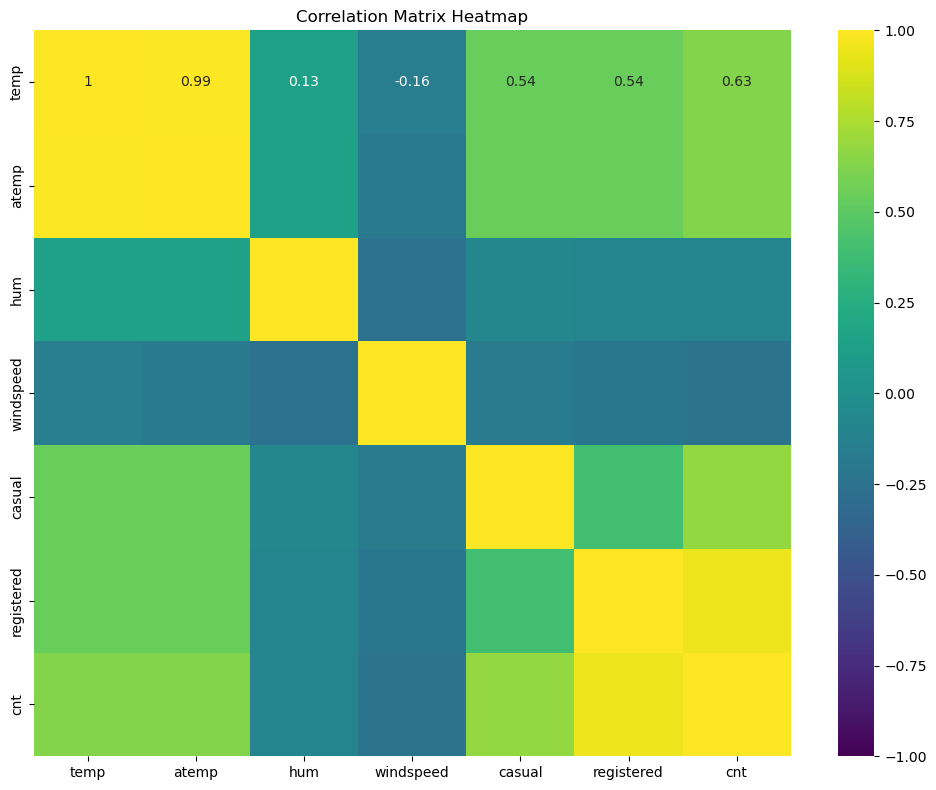


Correlation matrix:
                temp     atemp       hum  windspeed    casual  registered  \
temp        1.000000  0.991702  0.126963  -0.157944  0.543285    0.540012   
atemp       0.991702  1.000000  0.139988  -0.183643  0.543864    0.544192   
hum         0.126963  0.139988  1.000000  -0.248489 -0.077008   -0.091089   
windspeed  -0.157944 -0.183643 -0.248489   1.000000 -0.167613   -0.217449   
casual      0.543285  0.543864 -0.077008  -0.167613  1.000000    0.395282   
registered  0.540012  0.544192 -0.091089  -0.217449  0.395282    1.000000   
cnt         0.627494  0.631066 -0.100659  -0.234545  0.672804    0.945517   

                 cnt  
temp        0.627494  
atemp       0.631066  
hum        -0.100659  
windspeed  -0.234545  
casual      0.672804  
registered  0.945517  
cnt         1.000000  


In [58]:
# Correlation matrix
correlation_matrix = day_df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,  cmap='viridis', center=0, vmin=-1, vmax=1)

plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

print("\nCorrelation matrix:")
print(correlation_matrix)

**Insight:**
- Descriptive statistics:
    - Day.csv:
        - Rata-rata jumlah total peminjaman sepeda (cnt) adalah sekitar 4504 sepeda per hari.
        - Pengguna terdaftar (registered) jauh lebih banyak dibanding pengguna kasual (casual), dengan rata-rata 3656 vs 848.
        - Suhu rata-rata (temp) adalah 0.49 (skala 0-1), dengan nilai maksimum 0.86, yang menunjukkan variasi musim yang cukup lebar.
        - Kecepatan angin (windspeed) memiliki rata-rata 0.19, dengan maksimum 0.51.
        - Distribusi cuaca (weathersit) menunjukkan mayoritas hari memiliki kondisi cuaca kategori 1 dan 2 (baik hingga mendung ringan).
    - Hour.csv:
        - Rata-rata peminjaman sepeda per jam (cnt) adalah 173 sepeda, dengan maksimum 642 sepeda.
        - Jumlah peminjaman oleh pengguna terdaftar (registered) lebih tinggi dibanding pengguna kasual (casual) secara konsisten.
        - Suhu rata-rata (temp) hampir sama dengan data harian, sekitar 0.49, menunjukkan bahwa pengukuran suhu konsisten di kedua dataset.
- Categorical features distribution (Day.csv):
    - Distribusi Musim (season)
        - Musim semi (season = 3) memiliki jumlah hari terbanyak (188 hari), diikuti musim panas (184 hari) dan musim dingin (181 hari). Musim gugur (178 hari) memiliki jumlah hari paling sedikit.
        - Ini menunjukkan bahwa jumlah hari di setiap musim cukup seimbang.
    - Distribusi Kondisi Cuaca (weathersit)
        - Mayoritas hari (463 hari) memiliki cuaca kategori 1 (cerah atau sedikit mendung). 
        - 247 hari memiliki cuaca kategori 2 (mendung atau berkabut). 
        - Hanya 21 hari yang memiliki cuaca kategori 3 (hujan ringan atau salju ringan). 
        - Tidak ada hari dengan kondisi cuaca kategori 4 (hujan lebat atau badai), yang menunjukkan bahwa orang cenderung tidak menggunakan sepeda dalam kondisi cuaca ekstrem.
    - Distribusi Hari Kerja (workingday)
        - 500 hari adalah hari kerja (workingday = 1), sementara 231 hari adalah hari libur atau akhir pekan (workingday = 0).
        - Ini menunjukkan bahwa peminjaman sepeda sebagian besar terjadi di hari kerja.
    - Distribusi Hari Libur (holiday)
        - Hanya 21 hari yang merupakan hari libur resmi, sementara 710 hari bukan hari libur.
        - Ini menunjukkan bahwa peminjaman sepeda sebagian besar terjadi pada hari-hari biasa.

- Correlation matrix:
    - Hubungan antara variabel suhu dan jumlah peminjaman sepeda
        - Suhu (temp) memiliki korelasi positif kuat (0.63) dengan total peminjaman sepeda (cnt), menunjukkan bahwa semakin hangat cuaca, semakin banyak sepeda yang dipinjam.
        - Korelasi atemp (suhu terasa) terhadap cnt juga hampir sama (0.63).
    - Pengaruh kelembaban dan kecepatan angin
        - Kelembaban (hum) memiliki korelasi negatif lemah (-0.10) terhadap jumlah peminjaman sepeda (cnt), yang berarti kelembaban tinggi sedikit mengurangi penggunaan sepeda.
        - Kecepatan angin (windspeed) memiliki korelasi negatif sedang (-0.23) terhadap peminjaman sepeda, yang berarti saat angin lebih kencang, lebih sedikit orang yang menggunakan sepeda.
    - Pengaruh kategori pengguna
        - Jumlah peminjaman oleh pengguna kasual (casual) memiliki korelasi positif cukup kuat (0.67) terhadap total peminjaman sepeda (cnt).
        - Jumlah peminjaman oleh pengguna terdaftar (registered) memiliki korelasi sangat kuat (0.95) terhadap total peminjaman sepeda, menunjukkan bahwa peminjaman sepeda didominasi oleh pengguna terdaftar.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana jumlah penyewaan sepeda bervariasi berdasarkan musim, dan musim mana yang memiliki permintaan tertinggi?

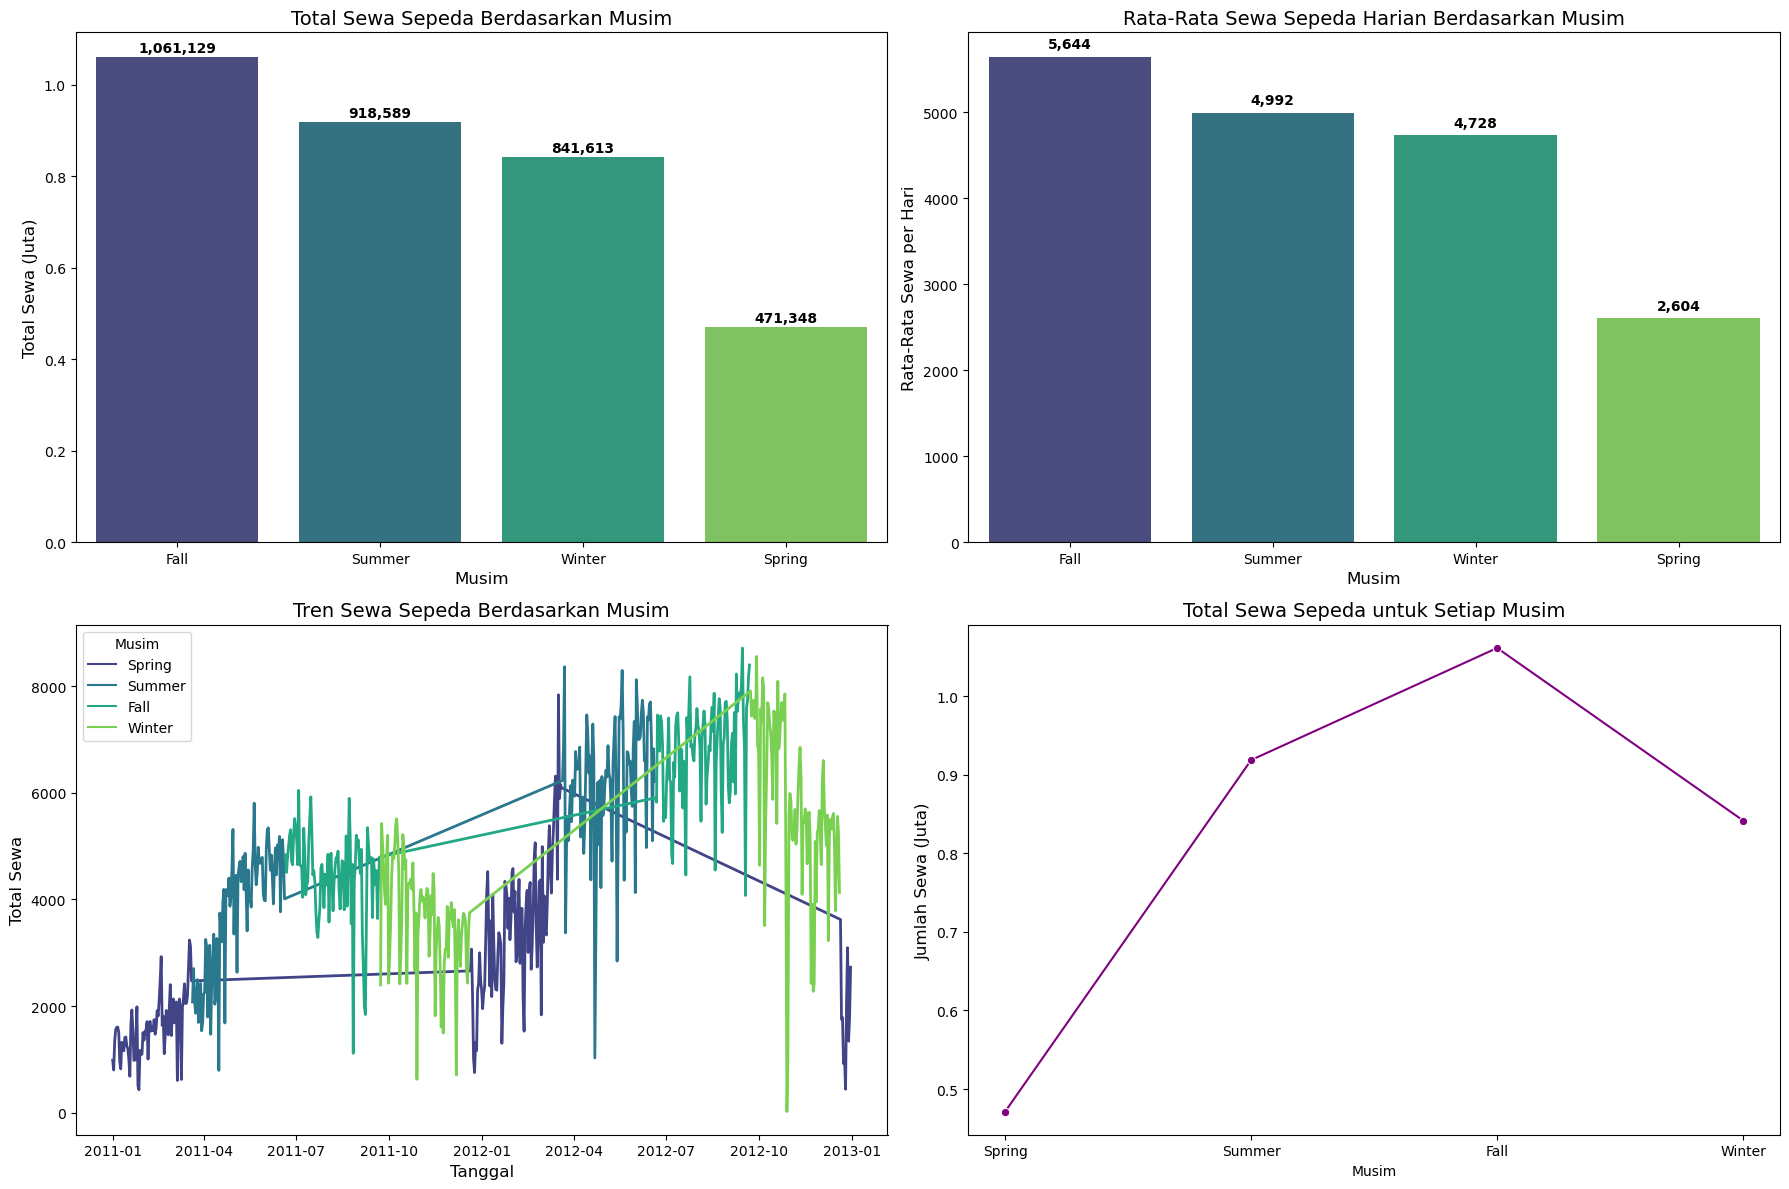

In [59]:
# Hitung statistik musiman
seasonal_stats = day_df.groupby("season_name")["cnt"].agg(["mean", "sum"]).sort_values("sum", ascending=False)

# Buat figure dengan 2 baris dan 2 kolom
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Bar Chart 1: Total Sewa Sepeda Berdasarkan Musim
sns.barplot(x=seasonal_stats.index, y=seasonal_stats["sum"], palette="viridis", ax=axes[0, 0])
axes[0, 0].set_title("Total Sewa Sepeda Berdasarkan Musim", fontsize=14)
axes[0, 0].set_ylabel("Total Sewa (Juta)", fontsize=12)
axes[0, 0].set_xlabel("Musim", fontsize=12)
axes[0, 0].yaxis.set_major_formatter(lambda x, _: f"{x/1e6:.1f}")

# Tambahkan angka di atas masing-masing bin
for i, v in enumerate(seasonal_stats["sum"]):
    axes[0, 0].text(i, v + 10000, f"{v:,.0f}", ha="center", fontsize=10, fontweight="bold")

# Bar Chart 2: Rata-rata Sewa Sepeda Harian Berdasarkan Musim
sns.barplot(x=seasonal_stats.index, y=seasonal_stats["mean"], palette="viridis", ax=axes[0, 1])
axes[0, 1].set_title("Rata-Rata Sewa Sepeda Harian Berdasarkan Musim", fontsize=14)
axes[0, 1].set_ylabel("Rata-Rata Sewa per Hari", fontsize=12)
axes[0, 1].set_xlabel("Musim", fontsize=12)

# Tambahkan angka di atas masing-masing bin
for i, v in enumerate(seasonal_stats["mean"]):
    axes[0, 1].text(i, v + 100, f"{v:,.0f}", ha="center", fontsize=10, fontweight="bold")

# Line Chart 1: Tren Sewa Sepeda Seiring Waktu Berdasarkan Musim
sns.lineplot(data=day_df, x="dteday", y="cnt", hue="season_name", palette="viridis", linewidth=2, ax=axes[1, 0])
axes[1, 0].set_title("Tren Sewa Sepeda Berdasarkan Musim", fontsize=14)
axes[1, 0].set_ylabel("Total Sewa", fontsize=12)
axes[1, 0].set_xlabel("Tanggal", fontsize=12)
axes[1, 0].legend(title="Musim")

# Line Chart 2: Total Sewa Sepeda untuk Setiap Musim
sns.lineplot(x="season_name", y="cnt", data=day_df, estimator="sum", ci=None, marker="o", color="purple", ax=axes[1, 1])
axes[1, 1].set_title("Total Sewa Sepeda untuk Setiap Musim", fontsize=14)
axes[1, 1].set_ylabel("Jumlah Sewa (Juta)", fontsize=12)
axes[1, 1].set_xlabel("Musim")
axes[1, 1].yaxis.set_major_formatter(lambda x, _: f"{x/1e6:.1f}")

plt.tight_layout()
plt.show()

**Insight:**
- **Total Sewa Sepeda Berdasarkan Musim (Bar Chart - Kiri Atas):**
    - Musim Fall (Gugur) memiliki total penyewaan tertinggi (~1,06 juta), disusul oleh Summer (Musim Panas) dan Winter (Musim Dingin), mengindikasikan bahwa musim ini memiliki kondisi optimal bagi pengguna untuk bersepeda, mungkin karena suhu yang nyaman dan kondisi cuaca yang mendukung.
    - Spring (Musim Semi) memiliki jumlah sewa terendah (~471 ribu), sekitar setengah dari Fall, mengindikasikan bahwa faktor cuaca atau tingkat aktivitas pengguna yang lebih rendah di musim ini bisa menjadi penyebabnya.
- **Rata-Rata Sewa Sepeda Harian Berdasarkan Musim (Bar Chart - Kanan Atas):**
    - Rata-rata sewa harian juga tertinggi pada Fall (5.644 sewa/hari), menunjukkan tingginya permintaan saat musim ini, mengindikasikan bahwa periode ini merupakan waktu yang sangat produktif untuk bisnis penyewaan sepeda. 
    - Spring memiliki rata-rata sewa harian terendah (~2.604 sewa/hari), mengindikasikan faktor cuaca atau preferensi pengguna yang menyebabkan minat bersepeda lebih rendah. 
    - Summer dan Winter memiliki angka sewa harian yang cukup seimbang, mengindikasikan bahwa meskipun ada perbedaan suhu ekstrem di kedua musim ini, masih terdapat minat yang cukup tinggi dalam penyewaan sepeda.
- **Tren Sewa Sepeda Berdasarkan Musim (Line Chart - Kiri Bawah):**
    - Tren menunjukkan peningkatan sewa secara bertahap dari awal tahun hingga mencapai puncaknya pada pertengahan tahun, kemudian menurun menjelang akhir tahun, mengindikasikan adanya pola musiman dalam penyewaan sepeda. 
    - Fluktuasi harian cukup tinggi, terutama di musim panas dan gugur, yang mungkin disebabkan oleh variasi cuaca atau aktivitas pengguna, mengindikasikan bahwa faktor lingkungan dan gaya hidup mempengaruhi tingkat penyewaan secara signifikan.
- **Total Sewa Sepeda untuk Setiap Musim (Line Chart - Kanan Bawah):**
    - Visualisasi ini mengonfirmasi bahwa jumlah sewa meningkat dari Spring → Summer → Fall lalu menurun saat memasuki Winter mengindikasikan adanya siklus tahunan yang dapat digunakan untuk strategi bisnis.
    - Fall menjadi musim paling optimal untuk penyewaan, sementara Spring memiliki permintaan paling rendah, mengindikasikan bahwa bisnis dapat memanfaatkan tren ini untuk menyesuaikan strategi operasional.<br>

- Musim Fall merupakan musim paling populer untuk penyewaan sepeda, baik dari total maupun rata-rata harian.
- Spring memiliki jumlah penyewaan terendah, mungkin karena kondisi cuaca atau kurangnya minat masyarakat untuk bersepeda di periode ini.
- Winter masih memiliki angka sewa yang cukup tinggi, kemungkinan karena pengguna yang sudah terbiasa menggunakan sepeda dalam kondisi dingin.
- Pola tren musiman ini bisa digunakan untuk strategi bisnis, seperti meningkatkan jumlah sepeda di musim Fall atau menawarkan promosi saat Spring untuk meningkatkan pemakaian.


### Pertanyaan 2:
Bagaimana pengaruh kondisi cuaca terhadap pola penyewaan sepeda?

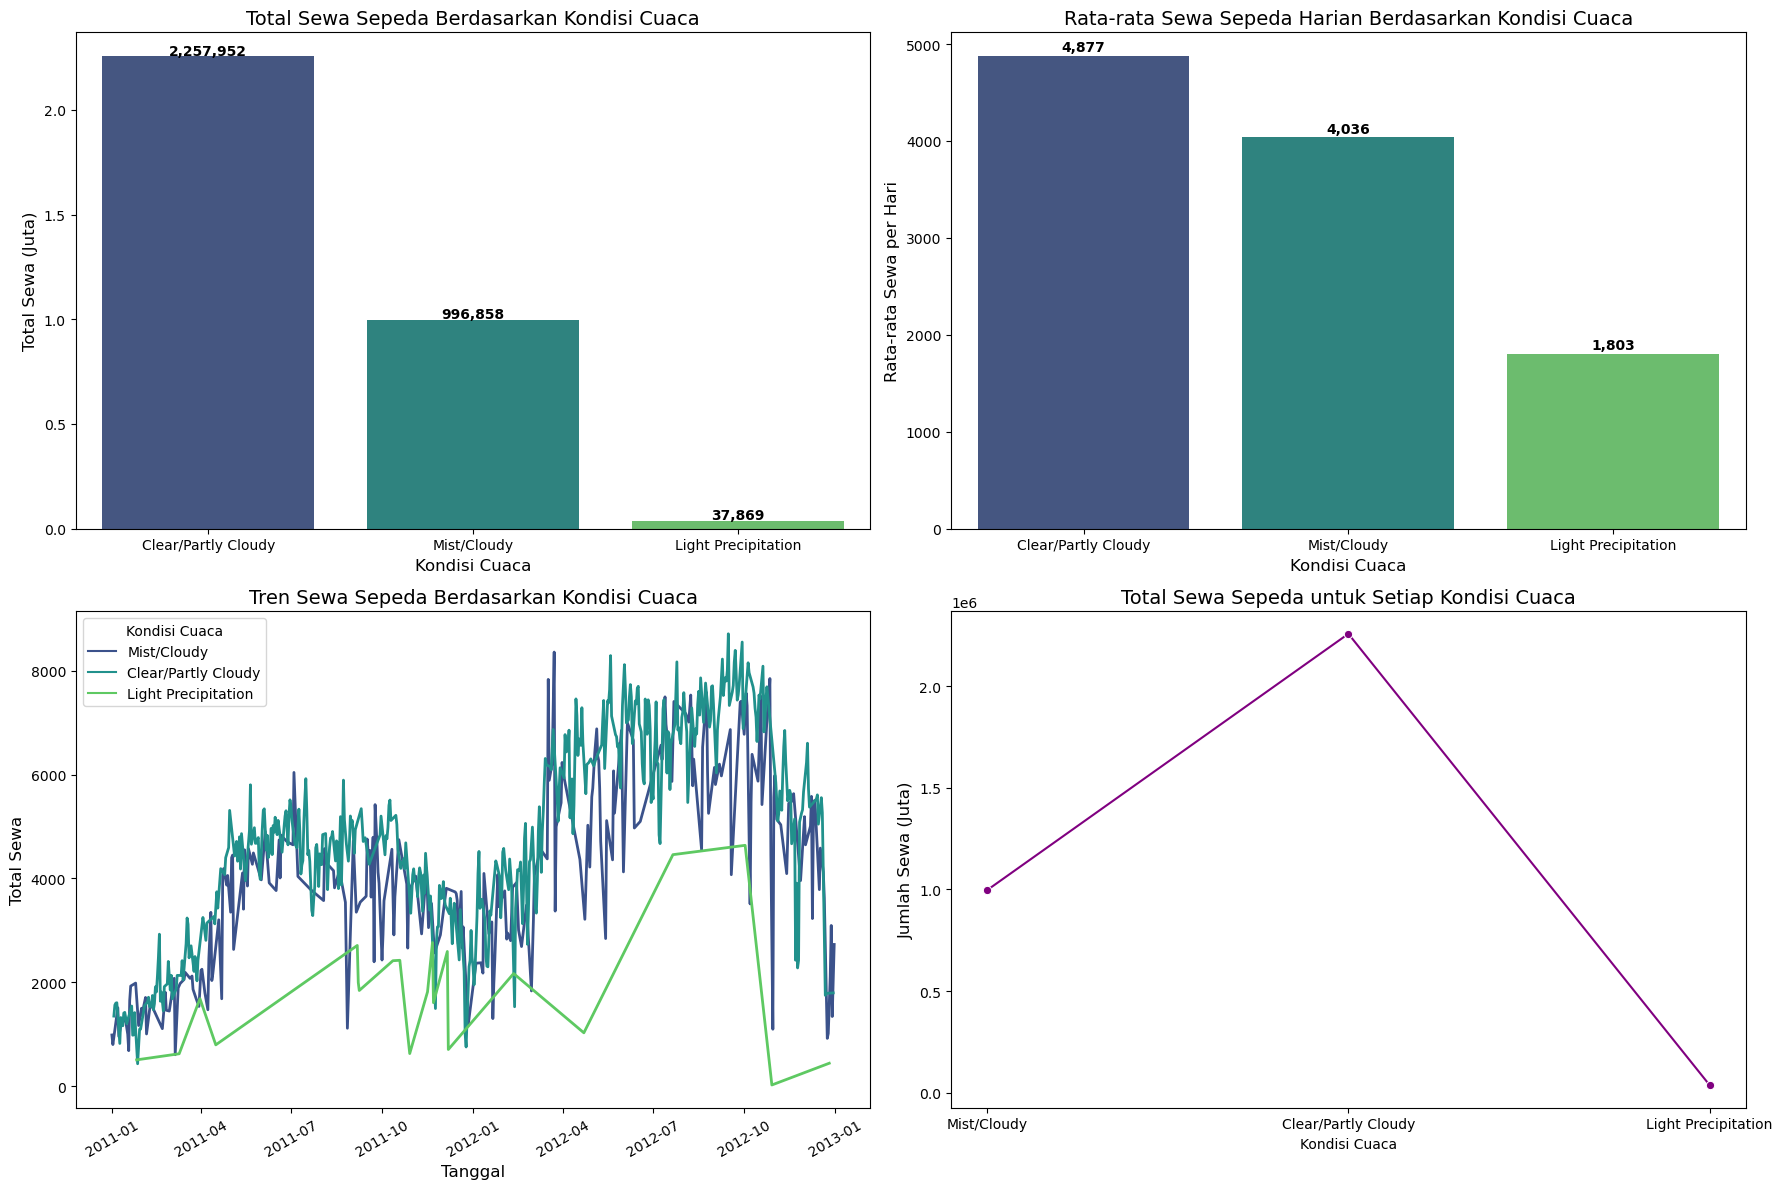

In [60]:
# Hitung statistik Sewa berdasarkan kondisi cuaca
weather_stats = day_df.groupby("weather_condition")["cnt"].agg(["mean", "sum"]).sort_values("sum", ascending=False)

# Buat figure dengan 2 baris dan 2 kolom
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Bar Chart 1: Total Sewa Sepeda Berdasarkan Kondisi Cuaca
sns.barplot(x=weather_stats.index, y=weather_stats["sum"], palette="viridis", ax=axes[0, 0])
axes[0, 0].set_title("Total Sewa Sepeda Berdasarkan Kondisi Cuaca", fontsize=14)
axes[0, 0].set_ylabel("Total Sewa (Juta)", fontsize=12)
axes[0, 0].set_xlabel("Kondisi Cuaca", fontsize=12)
axes[0, 0].tick_params(axis="x", rotation=0)
axes[0, 0].yaxis.set_major_formatter(lambda x, _: f"{x/1e6:.1f}")

# Tambahkan angka di atas masing-masing bin
for i, v in enumerate(weather_stats["sum"]):
    axes[0, 0].text(i, v + 7000, f"{v:,.0f}", ha="center", fontsize=10, fontweight="bold")

# Bar Chart 2: Rata-rata Sewa Sepeda Harian Berdasarkan Kondisi Cuaca
sns.barplot(x=weather_stats.index, y=weather_stats["mean"], palette="viridis", ax=axes[0, 1])
axes[0, 1].set_title("Rata-rata Sewa Sepeda Harian Berdasarkan Kondisi Cuaca", fontsize=14)
axes[0, 1].set_ylabel("Rata-rata Sewa per Hari", fontsize=12)
axes[0, 1].set_xlabel("Kondisi Cuaca", fontsize=12)
axes[0, 1].tick_params(axis="x", rotation=0)

# Tambahkan angka di atas masing-masing bin
for i, v in enumerate(weather_stats["mean"]):
    axes[0, 1].text(i, v + 50, f"{v:,.0f}", ha="center", fontsize=10, fontweight="bold")

# Line Chart 1: Tren Sewa Sepeda Berdasarkan Kondisi Cuaca Seiring Waktu
sns.lineplot(data=day_df, x="dteday", y="cnt", hue="weather_condition", palette="viridis", linewidth=2, ax=axes[1, 0])
axes[1, 0].set_title("Tren Sewa Sepeda Berdasarkan Kondisi Cuaca", fontsize=14)
axes[1, 0].set_ylabel("Total Sewa", fontsize=12)
axes[1, 0].set_xlabel("Tanggal", fontsize=12)
axes[1, 0].tick_params(axis="x", rotation=30)
axes[1, 0].legend(title="Kondisi Cuaca")

# Line Chart 2: Total Sewa Sepeda untuk Setiap Kondisi Cuaca
sns.lineplot(x="weather_condition", y="cnt", data=day_df, estimator="sum", ci=None, marker="o", color="purple", ax=axes[1, 1])
axes[1, 1].set_title("Total Sewa Sepeda untuk Setiap Kondisi Cuaca", fontsize=14)
axes[1, 1].set_ylabel("Jumlah Sewa (Juta)", fontsize=12)
axes[1, 1].set_xlabel("Kondisi Cuaca")
axes[1, 1].tick_params(axis="x", rotation=0)
axes[0, 0].yaxis.set_major_formatter(lambda x, _: f"{x/1e6:.1f}")

plt.tight_layout()
plt.show()

**Insight:**
- **Total Sewa Sepeda Berdasarkan Kondisi Cuaca (Bar Chart - Kiri Atas):**
    - Penyewaan sepeda paling tinggi terjadi pada kondisi Clear/Partly Cloudy (~2,26 juta sewa). 
    - Penyewaan menurun pada kondisi Mist/Cloudy (~996 ribu sewa). 
    - Light Precipitation (hujan ringan) memiliki jumlah sewa yang sangat rendah (~37 ribu), menunjukkan bahwa hujan sangat menghambat penggunaan sepeda.
- **Rata-Rata Sewa Sepeda Harian Berdasarkan Kondisi Cuaca (Bar Chart - Kanan Atas):**
    - Rata-rata sewa tertinggi terjadi saat Clear/Partly Cloudy (4.877 sewa/hari). 
    - Mist/Cloudy masih memiliki angka yang cukup tinggi (4.036 sewa/hari), meskipun lebih rendah dari kondisi cerah. 
    - Light Precipitation memiliki angka yang sangat rendah (1.803 sewa/hari), mengindikasikan dampak negatif hujan terhadap minat pengguna.
- **Tren Sewa Sepeda Berdasarkan Kondisi Cuaca (Line Chart - Kiri Bawah):**
    - Sewa sepeda meningkat seiring waktu, terutama pada hari cerah dan berawan. 
    - Penurunan signifikan terlihat saat terjadi hujan ringan, menunjukkan bahwa pengguna menghindari bersepeda dalam kondisi ini. 
    - Tren harian menunjukkan fluktuasi besar, kemungkinan dipengaruhi oleh faktor eksternal seperti suhu dan hari kerja vs. akhir pekan.
- **Total Sewa Sepeda untuk Setiap Kondisi Cuaca (Line Chart - Kanan Bawah):**
    - Grafik ini mempertegas bahwa Clear/Partly Cloudy adalah kondisi terbaik untuk penyewaan sepeda. 
    - Mist/Cloudy masih memiliki pangsa pasar yang besar dan bisa dioptimalkan. 
    - Light Precipitation memiliki jumlah penyewaan yang sangat kecil, menunjukkan perlunya strategi alternatif di kondisi ini.

Pengguna lebih cenderung menyewa sepeda saat cuaca cerah atau sedikit berawan.
Cuaca berkabut masih memungkinkan penggunaan sepeda, tetapi dengan penurunan permintaan yang cukup besar. Saat hujan ringan, permintaan turun drastis, mengindikasikan bahwa pengguna lebih memilih alternatif transportasi lain atau menghindari aktivitas bersepeda.

### Pertanyaan 3:
Bagaimana tren penyewaan sepeda per jam sepanjang hari, dan kapan waktu penggunaan tertinggi?

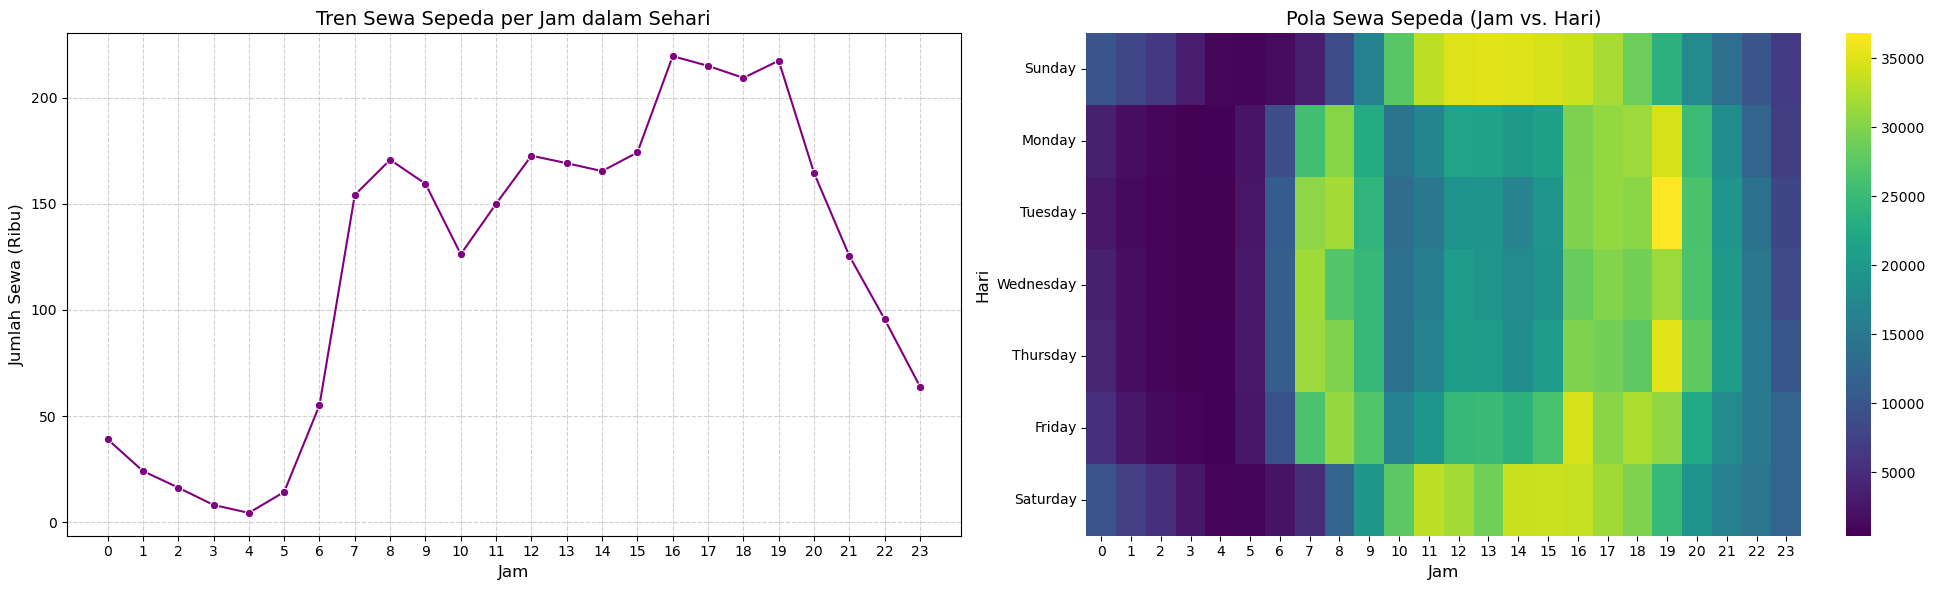

In [61]:
# Urutan hari dalam seminggu
day_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

# Buat visualisasi dalam 1 baris 2 kolom
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Line Chart - Tren Sewa per Jam
sns.lineplot(x="hr", y="cnt", data=hour_df, estimator="sum", ci=None, marker="o", color="purple", ax=axes[0])
axes[0].set_title("Tren Sewa Sepeda per Jam dalam Sehari", fontsize=14)
axes[0].set_ylabel("Jumlah Sewa (Ribu)", fontsize=12)
axes[0].set_xlabel("Jam", fontsize=12)
axes[0].set_xticks(range(0, 24, 1))  # Set grid berdasarkan jam (0-24)
axes[0].grid(axis="both", linestyle="--", alpha=0.6)  # Tambahkan grid
axes[0].yaxis.set_major_formatter(lambda x, _: f"{x/1e3:.0f}")

# Heatmap - Sewa Sepeda per Jam dan Hari
heatmap_data = hour_df.pivot_table(values="cnt", index="day_of_week", columns="hr", aggfunc="sum")
heatmap_data = heatmap_data.reindex(day_order)  # Urutkan berdasarkan hari yang benar

sns.heatmap(heatmap_data, cmap="viridis", ax=axes[1])
axes[1].set_title("Pola Sewa Sepeda (Jam vs. Hari)", fontsize=14)
axes[1].set_ylabel("Hari", fontsize=12)
axes[1].set_xlabel("Jam", fontsize=12)

plt.tight_layout()
plt.show()

**Insight:**
- **Tren Sewa Sepeda per Jam dalam Sehari:** 
    - Jumlah penyewaan sepeda rendah pada dini hari (00:00 - 05:00), dengan titik terendah sekitar pukul 04:00. 
    - Lonjakan signifikan terjadi sekitar pukul 07:00 - 09:00, dengan puncak pertama sekitar pukul 08:00 (~160 ribu sewa). 
    - Setelah itu, jumlah penyewaan menurun hingga siang hari, tetapi kembali meningkat pada sore hari. 
    - Puncak penyewaan tertinggi terjadi sekitar pukul 17:00 - 19:00, dengan titik maksimal pada pukul 18:00 (~210 ribu sewa). 
    - Setelah pukul 19:00, jumlah penyewaan menurun secara bertahap hingga malam hari.
    - Lonjakan pagi menunjukkan bahwa sepeda digunakan sebagai alat transportasi untuk perjalanan ke kantor/sekolah.
    - Lonjakan sore-malam menunjukkan penggunaan sepeda untuk perjalanan pulang kerja/sekolah serta aktivitas rekreasi atau olahraga.
    - Tren ini mengindikasikan bahwa mayoritas pengguna adalah pekerja atau pelajar yang menggunakan sepeda sebagai transportasi utama dalam jam sibuk.

- **Pola Sewa Sepeda (Jam vs. Hari):**
    - Senin - Jumat: Pola penyewaan menunjukkan dua puncak utama pada pagi (~08:00) dan sore (~19:00), mencerminkan jam sibuk. 
    - Sabtu - Minggu: Tren berbeda, di mana penyewaan meningkat lebih lambat di pagi hari dan puncak lebih merata di siang hingga sore (~10:00 - 18:00).
    - Warna terang pada heatmap menunjukkan intensitas penyewaan tertinggi, yang terutama terjadi pada sore hari di hari kerja. 
    - Hari kerja memiliki pola sewa yang lebih terstruktur karena keterikatan jadwal kerja dan sekolah. 
    - Akhir pekan menunjukkan pola yang lebih fleksibel, dengan sewa meningkat secara bertahap dan tersebar sepanjang hari. 
    - Ini mengindikasikan adanya perbedaan tujuan penggunaan sepeda: transportasi pada hari kerja dan rekreasi pada akhir pekan.

### Pertanyaan 4:
Apakah terdapat perbedaan yang signifikan dalam pola penyewaan sepeda antara hari kerja (weekdays) dan akhir pekan (weekends)?

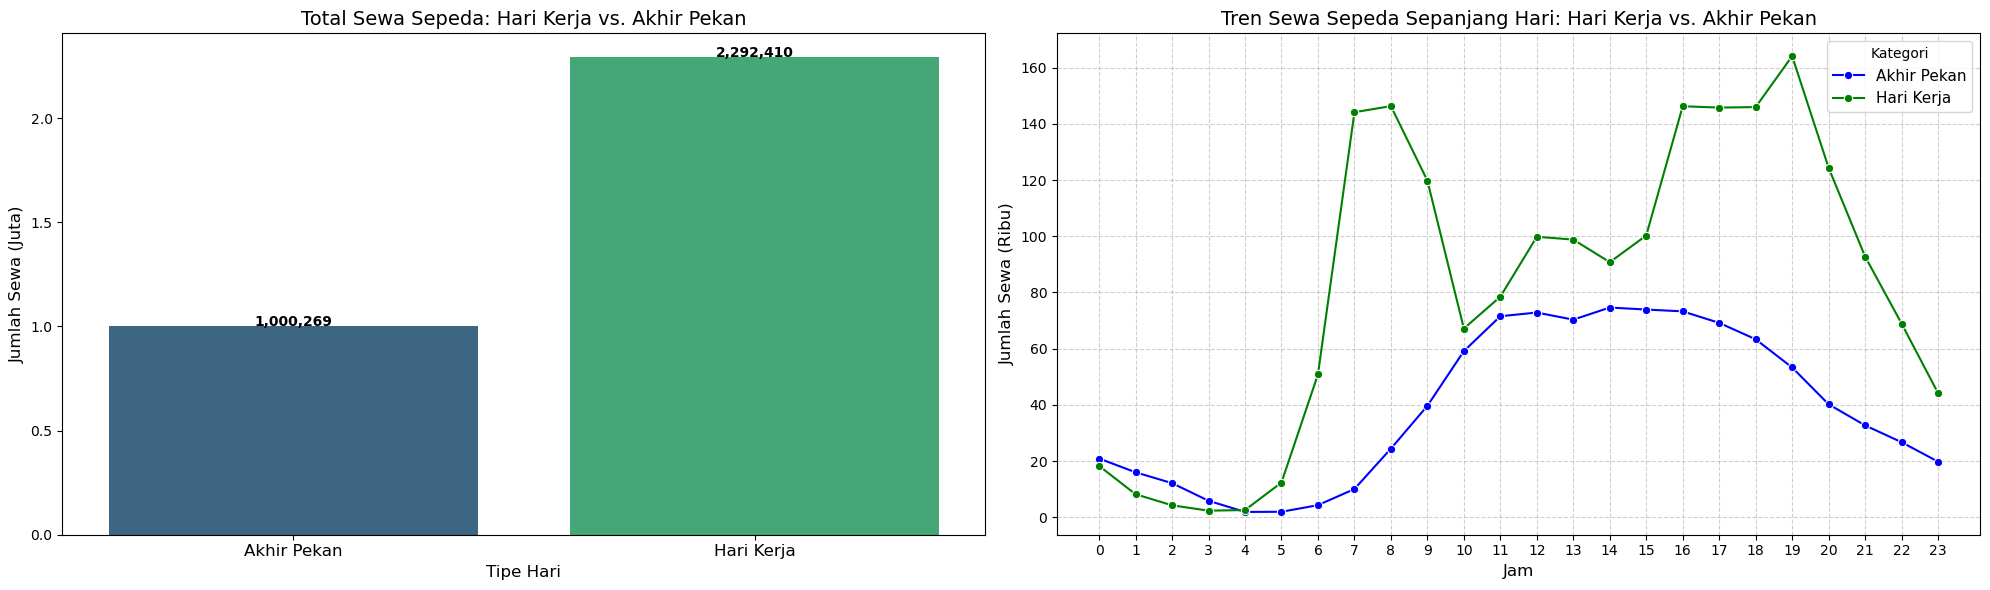

In [62]:
# Buat visualisasi dalam 1 baris 2 kolom
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Bar Chart Grouped - Total Sewa di Hari Kerja vs. Akhir Pekan
sns.barplot(x="workingday", y="cnt", data=day_df, estimator=sum, ci=None, palette="viridis", ax=axes[0])
axes[0].set_title("Total Sewa Sepeda: Hari Kerja vs. Akhir Pekan", fontsize=14)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["Akhir Pekan", "Hari Kerja"], fontsize=12)
axes[0].set_ylabel("Jumlah Sewa (Juta)", fontsize=12)
axes[0].set_xlabel("Tipe Hari", fontsize=12)
axes[0].yaxis.set_major_formatter(lambda x, _: f"{x/1e6:.1f}")

# Tambahkan angka di atas masing-masing bin
for i, v in enumerate(day_df.groupby("workingday")["cnt"].sum()):
    axes[0].text(i, v + 3000, f"{v:,.0f}", ha="center", fontsize=10, fontweight="bold")

# Line Chart - Tren Sewa di Hari Kerja vs. Akhir Pekan
sns.lineplot(x="hr", y="cnt", hue="workingday", data=hour_df, estimator=sum, ci=None, marker="o", palette=["blue", "green"], ax=axes[1])
axes[1].set_title("Tren Sewa Sepeda Sepanjang Hari: Hari Kerja vs. Akhir Pekan", fontsize=14)
axes[1].set_ylabel("Jumlah Sewa (Ribu)", fontsize=12)
axes[1].set_xlabel("Jam", fontsize=12)
axes[1].set_xticks(range(0, 24, 1))
axes[1].grid(axis="both", linestyle="--", alpha=0.6)
axes[1].legend(["Akhir Pekan", "Hari Kerja"], title="Kategori", fontsize=11)
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x/1e3:.0f}"))

plt.tight_layout()
plt.show()

**Insight:**
- **Total Penyewaan Sepeda: Hari Kerja vs. Akhir Pekan (Bar Chart - Kiri):**
    - Hari Kerja memiliki total penyewaan sepeda sebanyak 2,292,410 unit. 
    - Akhir Pekan memiliki total penyewaan sepeda sebanyak 1,000,269 unit. 
    - Jumlah penyewaan sepeda pada hari kerja sekitar 2,3 kali lipat dibandingkan akhir pekan.
    - Sepeda lebih sering digunakan sebagai alat transportasi utama pada hari kerja, kemungkinan besar untuk keperluan perjalanan ke kantor/sekolah.
    - Pada akhir pekan, penggunaan sepeda lebih rendah, mengindikasikan bahwa penggunaannya lebih bersifat rekreasi atau santai dibandingkan kebutuhan transportasi sehari-hari.
- **Tren Penyewaan Sepeda Sepanjang Hari: Hari Kerja vs. Akhir Pekan (Line Chart - Kanan):**
    - Hari Kerja: Pola penyewaan memiliki dua puncak utama: Pukul 08:00 (sekitar 145 ribu sewa) → Perjalanan ke kantor/sekolah. Pukul 18:00 - 19:00 (sekitar 160 ribu sewa) → Perjalanan pulang kerja/sekolah. Setelah pukul 19:00, jumlah penyewaan turun drastis.
    - Akhir Pekan: Pola lebih stabil tanpa lonjakan ekstrem. Penyewaan mulai meningkat dari pagi hari dan mencapai puncaknya antara 10:00 - 16:00, dengan sekitar 70 - 80 ribu sewa per jam. Jumlah sewa tetap lebih tinggi dibandingkan dini hari/malam, tetapi tidak ada lonjakan signifikan seperti di hari kerja
    - Hari kerja menunjukkan pola yang lebih tajam dengan lonjakan di pagi dan sore hari, mengindikasikan bahwa sepeda lebih sering digunakan sebagai alat transportasi utama pada hari kerja, kemungkinan besar untuk keperluan perjalanan ke kantor/sekolah.
    - Akhir pekan memiliki pola yang lebih merata, menunjukkan penggunaan sepeda untuk rekreasi, olahraga, atau aktivitas santai, bukan sebagai transportasi utama.
    - Tingkat penyewaan lebih tinggi di sore hari pada hari kerja dibandingkan akhir pekan, yang bisa dikaitkan dengan kepadatan lalu lintas dan kebutuhan perjalanan pulang.

### Pertanyaan 5:
Bagaimana distribusi dan rasio antara casual users dan registered users di berbagai periode waktu?

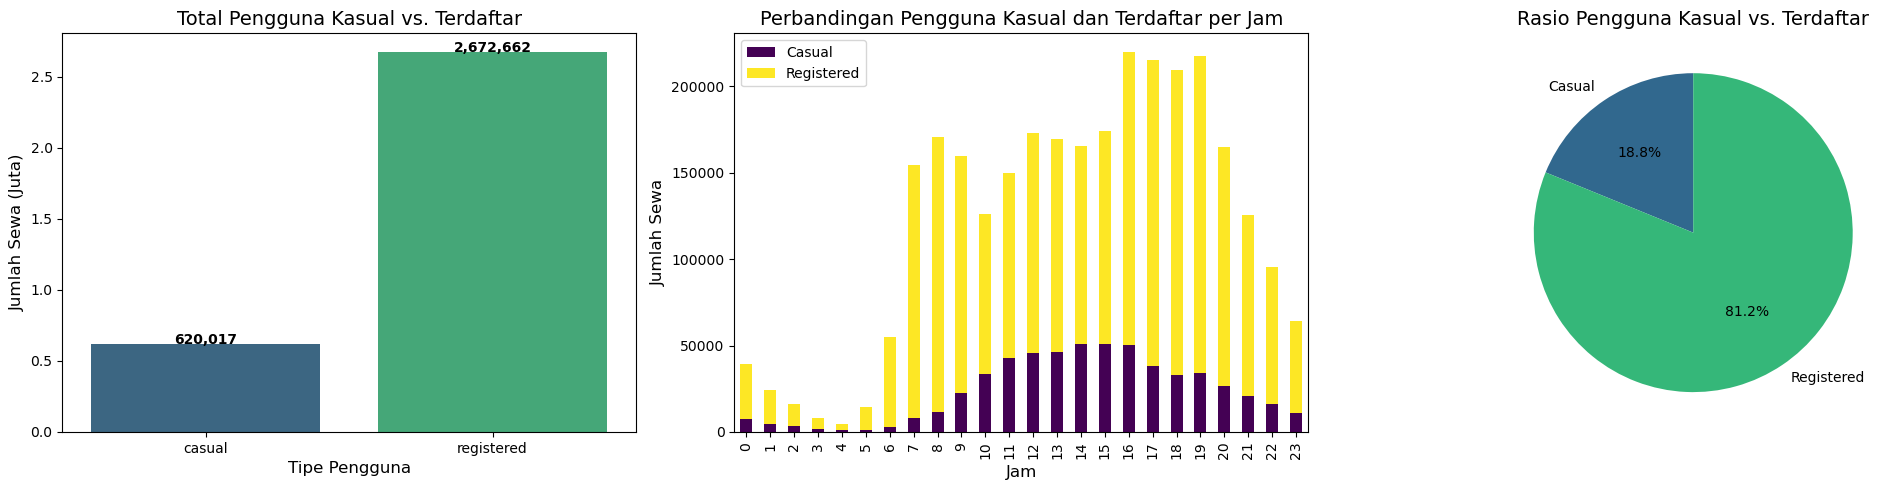

In [63]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Bar Chart Total Pengguna Kasual vs. Terdaftar
user_distribution = day_df[["casual", "registered"]].sum()
sns.barplot(x=user_distribution.index, y=user_distribution.values, palette="viridis", ax=axes[0])
axes[0].set_title("Total Pengguna Kasual vs. Terdaftar", fontsize=14)
axes[0].set_xlabel("Tipe Pengguna", fontsize=12)
axes[0].set_ylabel("Jumlah Sewa (Juta)", fontsize=12)
axes[0].yaxis.set_major_formatter(lambda x, _: f"{x/1e6:.1f}")

# Tambahkan angka di atas masing-masing bin
for i, v in enumerate(user_distribution.values):
    axes[0].text(i, v + 1500, f"{v:,.0f}", ha="center", fontsize=10, fontweight="bold")

# Bar Chart Stacked - Pengguna Kasual vs. Terdaftar per Jam
hourly_grouped = hour_df.groupby("hr")[["casual", "registered"]].sum().reset_index()
hourly_grouped.plot(x="hr", kind="bar", stacked=True, colormap="viridis", ax=axes[1])
axes[1].set_title("Perbandingan Pengguna Kasual dan Terdaftar per Jam", fontsize=14)
axes[1].set_xlabel("Jam", fontsize=12)
axes[1].set_ylabel("Jumlah Sewa", fontsize=12)
axes[1].legend(["Casual", "Registered"])

# Pie Chart - Rasio Pengguna Kasual vs. Terdaftar
axes[2].pie(user_distribution, labels=["Casual", "Registered"], autopct="%1.1f%%", colors=sns.color_palette("viridis", 2), startangle=90)
axes[2].set_title("Rasio Pengguna Kasual vs. Terdaftar", fontsize=14)

plt.tight_layout()
plt.show()

**Insight:**
- **Total Pengguna Kasual vs. Terdafar (Bar Chart - Kiri):**
    - Registered users mendominasi dengan total 2,672,662 penyewaan sepeda. 
    - Casual users memiliki total penyewaan jauh lebih rendah, hanya 620,017. 
    - Registered users berkontribusi lebih dari 4 kali lipat dibanding casual users dalam hal jumlah penyewaan.
    - Sebagian besar penyewaan dilakukan oleh pengguna terdaftar, yang kemungkinan besar menggunakan sepeda untuk keperluan transportasi harian (misalnya perjalanan kerja atau sekolah).
    - Casual users lebih sedikit karena mungkin mereka hanya menyewa untuk rekreasi atau kebutuhan sesekali.
- **Perbandingan Pengguna Kasual dan Terdaftar per Jam (Bar Chart - Tengah):**
    - Registered users memiliki pola penyewaan yang kuat pada jam sibuk, terutama pukul 07:00 - 09:00 dan 17:00 - 19:00. 
    - Casual users lebih dominan di siang hari, dengan lonjakan bertahap dari 10:00 - 16:00. 
    - Saat jam sibuk, jumlah penyewaan registered users jauh lebih tinggi dibanding casual users
    - Registered users lebih banyak beraktivitas pada hari kerja, yang sesuai dengan pola perjalanan pekerja kantoran atau pelajar.
    - Casual users lebih aktif pada siang hari, kemungkinan besar karena mereka menggunakan sepeda untuk wisata, jalan santai, atau aktivitas rekreasi.
    - Lonjakan penyewaan registered users pada pagi dan sore hari menunjukkan pola perjalanan kerja pulang-pergi, sedangkan penyewaan casual users lebih merata tanpa lonjakan ekstrem.
- **Rasio Pengguna Kasual vs. Terdaftar (Pie Chart - Kanan):**
    - Registered users mendominasi dengan 81.2% dari total penyewaan, sedangkan casual users hanya 18.8%.
    - Sebagian besar pelanggan adalah pengguna setia yang berlangganan layanan penyewaan sepeda, sehingga strategi bisnis bisa lebih fokus pada mempertahankan dan meningkatkan layanan bagi mereka.
    - Casual users memiliki porsi kecil, sehingga ada peluang untuk meningkatkan pangsa pasar dengan menawarkan promosi atau paket fleksibel bagi pelanggan non-terdaftar.




### Pertanyaan 6:
Bagaimana dampak hari libur (holiday) terhadap pola penyewaan sepeda dibandingkan dengan hari biasa (regular)?

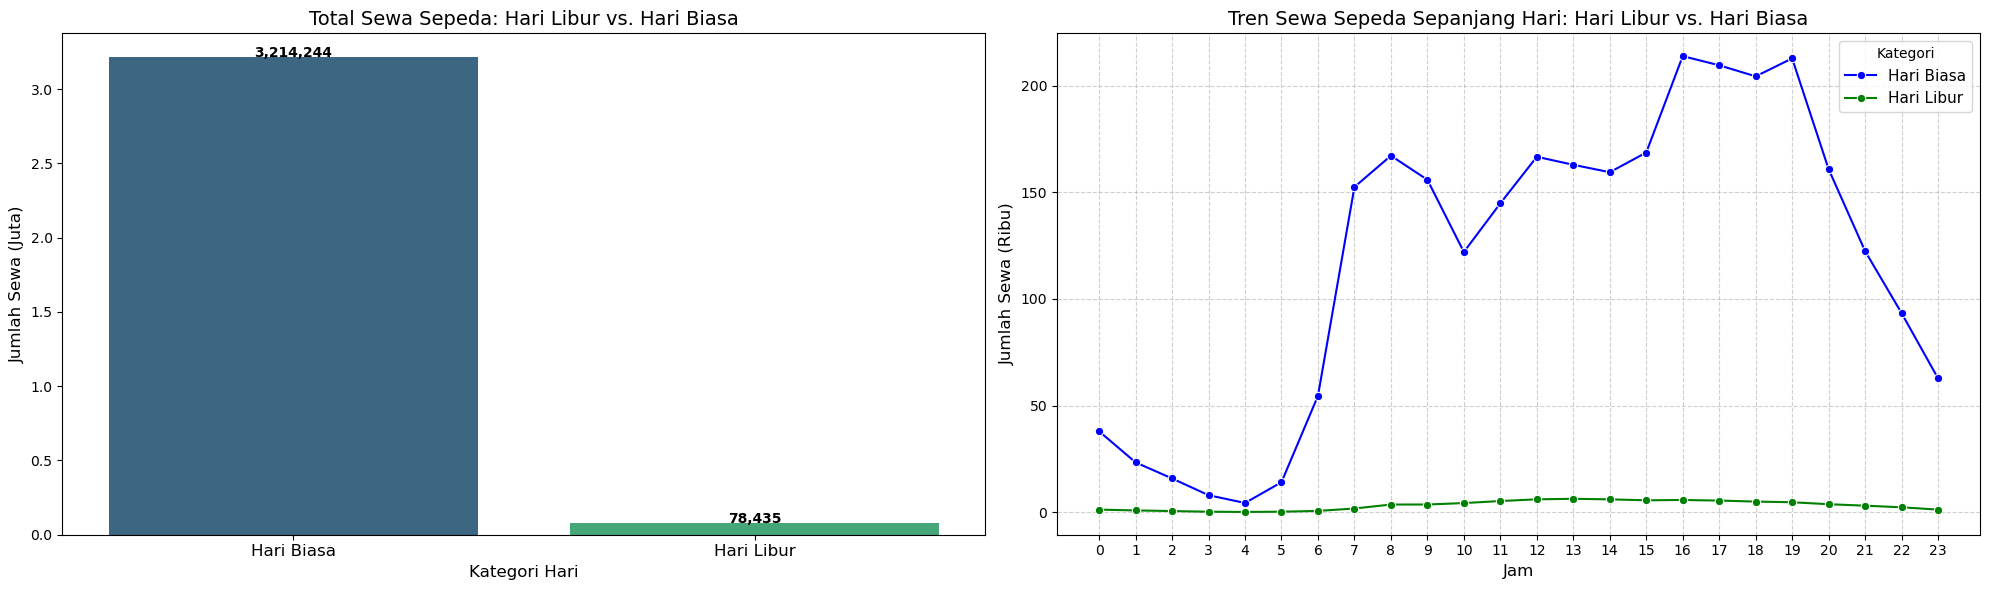

In [64]:
# Buat visualisasi dalam 1 baris 2 kolom
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Bar Chart Grouped - Total Sewa di Hari Libur vs. Hari Biasa
sns.barplot(x="holiday", y="cnt", data=day_df, estimator=sum, ci=None, palette="viridis", ax=axes[0])
axes[0].set_title("Total Sewa Sepeda: Hari Libur vs. Hari Biasa", fontsize=14)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["Hari Biasa", "Hari Libur"], fontsize=12)
axes[0].set_ylabel("Jumlah Sewa (Juta)", fontsize=12)
axes[0].set_xlabel("Kategori Hari", fontsize=12)

# Format y-label ke dalam ribuan untuk keterbacaan
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x/1e6:.1f}"))

# Tambahkan angka di atas masing-masing bin
for i, v in enumerate(day_df.groupby("holiday")["cnt"].sum()):
    axes[0].text(i, v + 3000, f"{v:,.0f}", ha="center", fontsize=10, fontweight="bold")

# Line Chart - Tren Sewa di Hari Libur vs. Hari Biasa
sns.lineplot(x="hr", y="cnt", hue="holiday", data=hour_df, estimator=sum, ci=None, marker="o", palette=["blue", "green"], ax=axes[1])
axes[1].set_title("Tren Sewa Sepeda Sepanjang Hari: Hari Libur vs. Hari Biasa", fontsize=14)
axes[1].set_ylabel("Jumlah Sewa (Ribu)", fontsize=12)
axes[1].set_xlabel("Jam", fontsize=12)
axes[1].set_xticks(range(0, 24, 1))  # Ubah grid ke 24 jam
axes[1].grid(axis="both", linestyle="--", alpha=0.6)  # Tambahkan grid
axes[1].legend(["Hari Biasa", "Hari Libur"], title="Kategori", fontsize=11)

# Format y-label menjadi ribuan
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x/1e3:.0f}"))

plt.tight_layout()
plt.show()

**Insight:**
- **Total Sewa Sepeda: Hari Libur vs. Hari Biasa (Bar Chart - Kiri):**
    - Penyewaan sepeda pada hari biasa (regular) jauh lebih tinggi dibandingkan dengan hari libur (holiday).
    - Selisih jumlah penyewaan yang signifikan menunjukkan bahwa sepeda lebih sering digunakan pada hari-hari kerja atau aktivitas rutin dibandingkan saat libur.
- **Tren Sewa Sepeda Sepanjang Hari: Hari Libur vs. Hari Biasa (Line Chart - Kanan):**
    - Hari biasa memiliki pola penyewaan yang teratur dengan lonjakan signifikan pada pagi (07:00 - 09:00) dan sore (17:00 - 19:00), yang menandakan pola perjalanan kerja.
    - Hari libur menunjukkan pola yang lebih merata, dengan peningkatan bertahap dari pagi hingga sore, tanpa lonjakan signifikan.

### Pertanyaan 7:
Apakah terdapat korelasi antara suhu, kelembaban, kecepatan angin, dan jumlah penyewaan sepeda?

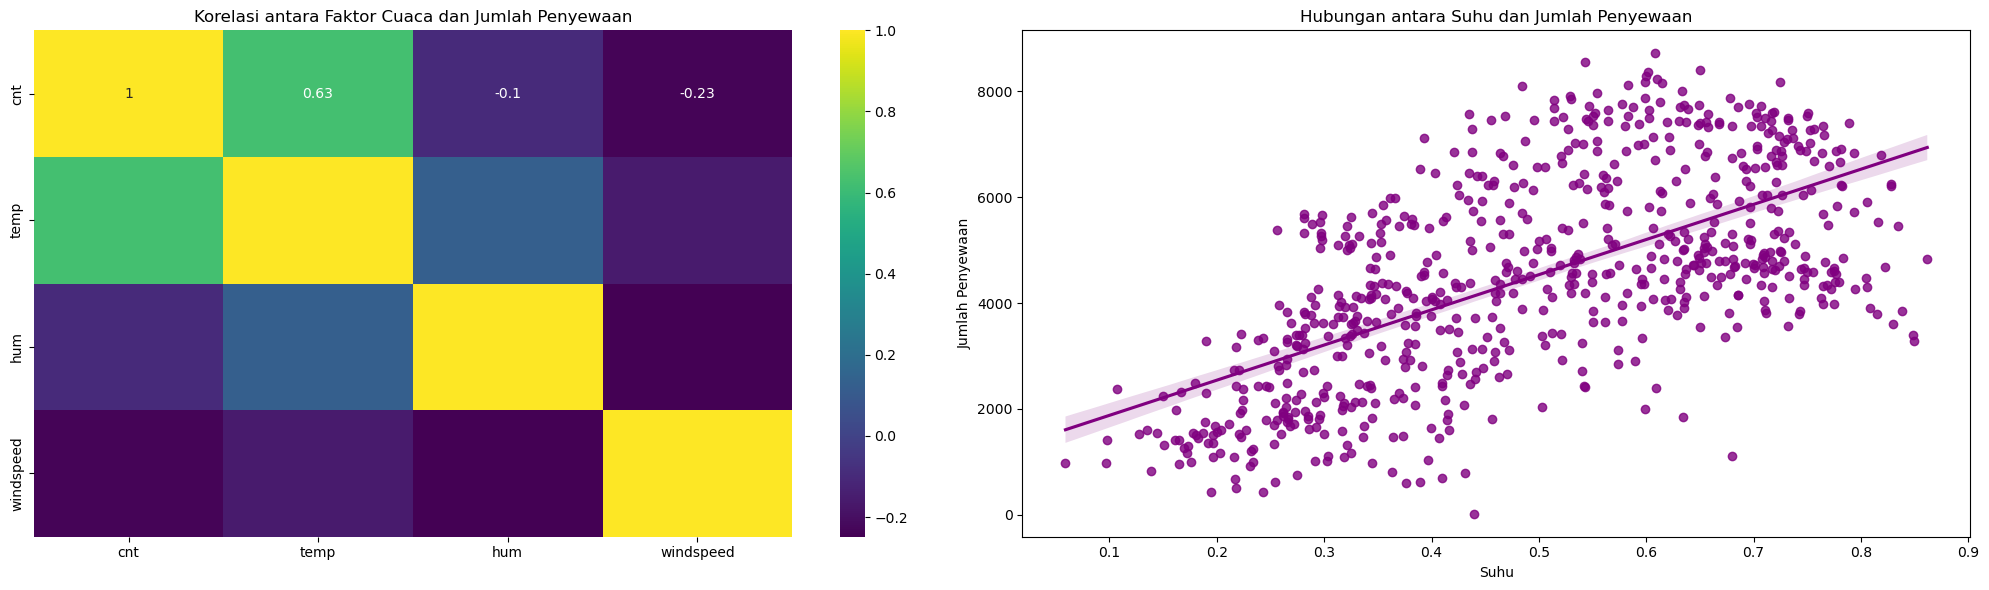

In [65]:
# Pertanyaan 7: Korelasi antara kondisi cuaca, suhu, kelembaban, kecepatan angin, dan jumlah penyewaan sepeda
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Heatmap - Correlation Matrix
corr_matrix = day_df[["cnt", "temp", "hum", "windspeed"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="viridis", ax=axes[0])
axes[0].set_title("Korelasi antara Faktor Cuaca dan Jumlah Penyewaan")

# Scatter Plot dengan Correlation Line - Temp vs. Penyewaan
sns.regplot(x="temp", y="cnt", data=day_df, ax=axes[1], color="purple")
axes[1].set_title("Hubungan antara Suhu dan Jumlah Penyewaan")
axes[1].set_xlabel("Suhu")
axes[1].set_ylabel("Jumlah Penyewaan")

plt.tight_layout()
plt.show()

**Insight:**
- **Korelasi antara Faktor Cuaca dan Jumlah Penyewaan (Heatmap - Kiri):**
    - Suhu (temp) memiliki korelasi positif yang cukup kuat (0.63) terhadap jumlah penyewaan sepeda, yang berarti semakin tinggi suhu, semakin banyak sepeda yang disewa.
    - Kelembaban (hum) memiliki korelasi negatif lemah (-0.1), menunjukkan bahwa kelembaban tidak terlalu mempengaruhi jumlah penyewaan.
    - Kecepatan angin (windspeed) memiliki korelasi negatif (-0.23), yang berarti semakin kencang angin, semakin sedikit jumlah penyewaan sepeda, meskipun pengaruhnya tidak terlalu besar.
    - Suhu merupakan faktor lingkungan yang paling mempengaruhi penyewaan sepeda, karena cuaca yang lebih hangat cenderung lebih nyaman untuk bersepeda.
    - Kelembaban tidak terlalu signifikan, mungkin karena pengguna lebih memperhatikan suhu dibandingkan tingkat kelembaban udara.
    - Kecepatan angin yang tinggi bisa membuat perjalanan bersepeda menjadi lebih sulit, sehingga dapat mengurangi jumlah penyewaan sepeda.
- **Hubungan antara Suhu dan Jumlah Penyewaan (Scatter Plot - Kanan):**
    - Scatter plot menunjukkan tren positif yang jelas antara suhu dan jumlah penyewaan, dikonfirmasi dengan garis regresi yang menunjukkan peningkatan jumlah sewa saat suhu naik.
    - Meskipun ada beberapa penyebaran data yang variatif, tren keseluruhannya tetap menunjukkan hubungan positif yang kuat.
    - Suhu yang lebih tinggi mendorong lebih banyak orang untuk menyewa sepeda, kemungkinan karena cuaca lebih nyaman untuk bersepeda.
    - Namun, pada suhu yang sangat tinggi (di atas titik tertentu), mungkin ada titik jenuh di mana penyewaan mulai menurun karena cuaca menjadi terlalu panas.

## Analisis Lanjutan (Opsional)

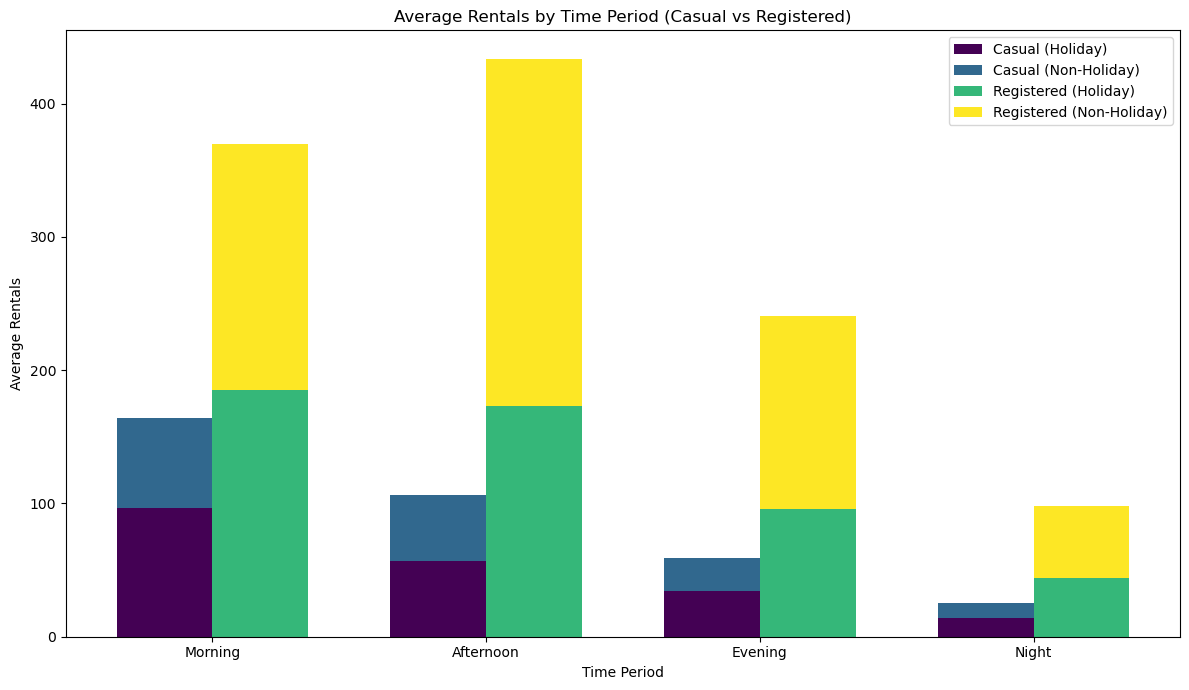

In [66]:
# Clustering
# Definisikan kategori waktu berdasarkan jam
def categorize_time(hour):
    if 5 <= hour <= 11:
        return "Morning"
    elif 12 <= hour <= 16:
        return "Afternoon"
    elif 17 <= hour <= 20:
        return "Evening"
    else:
        return "Night"

# Tambahkan kolom kategori waktu
hour_df["TimePeriod"] = hour_df["hr"].apply(categorize_time)

# Kelompokkan data berdasarkan TimePeriod dan holiday
time_period_clusters = hour_df.groupby(["TimePeriod", "holiday"]).agg({
    "casual": "mean",
    "registered": "mean"
}).reset_index()

# Generate warna dari colormap Viridis
viridis = cm.get_cmap("viridis", 4)
colors = {
    "holiday_casual": mcolors.to_hex(viridis(0)),
    "non_holiday_casual": mcolors.to_hex(viridis(1)),
    "holiday_registered": mcolors.to_hex(viridis(2)),
    "non_holiday_registered": mcolors.to_hex(viridis(3))
}

# Visualisasi hasil clustering
fig, ax = plt.subplots(figsize=(12, 7))
bar_width = 0.35  # Lebar bar
time_labels = ["Morning", "Afternoon", "Evening", "Night"]
index = np.arange(len(time_labels))

# Pisahkan data berdasarkan kategori hari libur dan non-libur
holiday_data = time_period_clusters[time_period_clusters["holiday"] == 1]
non_holiday_data = time_period_clusters[time_period_clusters["holiday"] == 0]

# Plot stacked bars untuk casual users
ax.bar(index, 
    holiday_data["casual"], 
    bar_width, label="Casual (Holiday)", color=colors["holiday_casual"])

ax.bar(index, 
    non_holiday_data["casual"], 
    bar_width, bottom=holiday_data["casual"], label="Casual (Non-Holiday)", color=colors["non_holiday_casual"])

# Plot stacked bars untuk registered users
ax.bar(index + bar_width, 
    holiday_data["registered"], 
    bar_width, label="Registered (Holiday)", color=colors["holiday_registered"])

ax.bar(index + bar_width, 
    non_holiday_data["registered"], 
    bar_width, bottom=holiday_data["registered"], label="Registered (Non-Holiday)", color=colors["non_holiday_registered"])

# Tambahkan label dan legenda
ax.set_xlabel("Time Period")
ax.set_ylabel("Average Rentals")
ax.set_title("Average Rentals by Time Period (Casual vs Registered)")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(time_labels)
ax.legend()

plt.tight_layout()
plt.show()


**Insight:**
- **Pola Penyewaan Berdasarkan Waktu dan Jenis Pengguna:**
    - Pagi hari (Morning): Pengguna terdaftar (registered) mendominasi penyewaan sepeda, terutama pada hari kerja. Pengguna kasual lebih sedikit.
    - Siang hingga sore (Afternoon): Penyewaan meningkat drastis, terutama oleh pengguna terdaftar.
    - Malam hari (Evening & Night): Penyewaan berkurang secara signifikan, terutama dari pengguna kasual.
    - Pengguna terdaftar (registered) lebih sering menyewa di pagi dan sore hari, yang menunjukkan pola perjalanan komuter (work-home travel).
    - Pengguna kasual cenderung menyewa di siang dan sore hari, yang kemungkinan besar terkait dengan aktivitas rekreasi atau wisata.
    - Hari libur memiliki lebih banyak penyewaan oleh pengguna kasual dibandingkan hari kerja.

- **Perbedaan antara Hari Libur dan Hari Kerja:**
    - Hari kerja: Pengguna terdaftar mendominasi, terutama di pagi dan sore hari.
    - Hari libur: Pengguna kasual meningkat drastis di siang dan sore hari, tetapi masih lebih sedikit dibandingkan pengguna terdaftar secara keseluruhan.
    - Layanan penyewaan dapat meningkatkan kapasitas sepeda di pagi dan sore hari untuk mengakomodasi pengguna terdaftar.
    -  Strategi pemasaran bisa difokuskan pada pengguna kasual di hari libur, misalnya dengan paket diskon atau rute wisata menarik.
    - Jam operasional bisa disesuaikan agar lebih fleksibel di akhir pekan untuk meningkatkan jumlah penyewaan malam.

- **Potensi Optimalisasi Bisnis Berdasarkan Pola Penyewaan**
    - Optimalisasi jumlah sepeda → Tambah kapasitas sepeda di pagi dan sore hari untuk mengakomodasi pengguna terdaftar.
    - Strategi harga dinamis → Tarif lebih tinggi pada jam sibuk (morning & evening) dan promo diskon untuk pengguna kasual di siang hari.
    - Fokus layanan di hari libur → Promosi dan event khusus bagi pengguna kasual di siang dan sore hari.
    - Pemanfaatan data untuk prediksi permintaan → Menyesuaikan jumlah sepeda berdasarkan prediksi pola sewa di setiap waktu.

## Conclusion

- Pola Musiman: Penyewaan sepeda tertinggi terjadi di musim gugur dan terendah di musim semi.
- Pengaruh Cuaca: Cuaca buruk (hujan/salju) menurunkan jumlah penyewaan, terutama bagi pengguna kasual.
- Tren Per Jam: Puncak penyewaan terjadi pada pagi (07:00-09:00) dan sore (17:00-19:00) di hari kerja, sedangkan di akhir pekan lebih merata sepanjang siang hingga sore.
- Tren Harian: Hari kerja didominasi oleh pengguna terdaftar, sedangkan akhir pekan lebih banyak menarik pengguna kasual.
- Perbedaan Pengguna: Pengguna terdaftar lebih konsisten menyewa sepanjang tahun, sedangkan pengguna kasual sangat dipengaruhi oleh musim dan cuaca.
- Perbedaan Hari Libur vs. Hari Biasa: Penyewaan sepeda pada hari biasa jauh lebih tinggi dibandingkan hari libur.
- Korelasi Faktor Lingkungan: Suhu yang lebih tinggi meningkatkan penyewaan, tetapi kelembaban dan kecepatan angin yang tinggi menguranginya.
- Clustering Berdasarkan Waktu:
    - Pagi & Sore → Dominasi pengguna terdaftar (perjalanan komuter).
    - Siang → Dominasi pengguna kasual (aktivitas rekreasi).
    - Malam → Penyewaan rendah untuk semua kategori pengguna.<br><br>

**Recommendation:**
- Penyesuaian Sesuai Musim:
    - Tambah sepeda di musim gugur (puncak penyewaan).
    - Kurangi operasional di musim dingin atau tawarkan promosi untuk menarik pengguna kasual.
- Strategi Cuaca & Diskon Dinamis:
    - Tawarkan diskon atau insentif bagi pengguna kasual saat cuaca kurang bersahabat.
    - Sediakan stasiun penampungan atau shelter sepeda di lokasi strategis saat cuaca buruk.
- Penyesuaian Tarif Sesuai Waktu:
    - Tarif premium saat jam sibuk (pagi & sore hari kerja).
    - Diskon untuk siang hari guna menarik lebih banyak pengguna kasual.
- Strategi Layanan Berdasarkan Hari
    - Tingkatkan promosi paket wisata atau sewa harian untuk pengguna kasual di akhir pekan.
- Inovasi & Promosi untuk Malam Hari:
    - Kampanye atau event khusus seperti “Night Ride” untuk meningkatkan penyewaan malam hari.
    - Peningkatan keamanan dan penerangan di jalur sepeda untuk mendorong penggunaan malam.
- Kerjasama dengan Bisnis Lokal:
    - Kolaborasi dengan tempat wisata, restoran, dan hotel untuk menyediakan paket sewa sepeda dengan diskon.
    - Sponsor atau iklan di sepeda untuk menambah sumber pendapatan.